In [10]:
#fc barcelona agreed to let ilkay gundogan leave to register dani olmo.
#was this a good choice? take a look at the heatmaps for each player
#when they played in the euro 24 quarterfinal and take your pick!

In [2]:
import json
import pandas as pd
import os

In [3]:
#define the paths to the matches folder and laod them
data_folder='./open-data/data'

matches_file = os.path.join(data_folder, 'matches', '55', '282.json')  #For UEFA Euro 2024 (competition_id: 55, season_id: 282)
with open(matches_file) as f:
    matches = json.load(f)

matches_df = pd.DataFrame(matches)

# Display the match details
print(matches_df[['match_id', 'home_team', 'away_team', 'match_date']].head())

   match_id                                          home_team  \
0   3942819  {'home_team_id': 941, 'home_team_name': 'Nethe...   
1   3943043  {'home_team_id': 772, 'home_team_name': 'Spain...   
2   3942752  {'home_team_id': 772, 'home_team_name': 'Spain...   
3   3942382  {'home_team_id': 941, 'home_team_name': 'Nethe...   
4   3942349  {'home_team_id': 780, 'home_team_name': 'Portu...   

                                           away_team  match_date  
0  {'away_team_id': 768, 'away_team_name': 'Engla...  2024-07-10  
1  {'away_team_id': 768, 'away_team_name': 'Engla...  2024-07-14  
2  {'away_team_id': 771, 'away_team_name': 'Franc...  2024-07-09  
3  {'away_team_id': 909, 'away_team_name': 'Turke...  2024-07-06  
4  {'away_team_id': 771, 'away_team_name': 'Franc...  2024-07-05  


In [4]:
#use the euro quarters match_id
match_id = '3942226'

#path to the events folder
events_file=os.path.join(data_folder, 'events', f'{match_id}.json')

#load the event data for the euro final
with open(events_file) as f:
    events=json.load(f)
    
#convert to df
events_df=pd.DataFrame(events)

#display the first few events
print(events_df[['type', 'player', 'location', 'team']].head())

                                type                               player  \
0  {'id': 35, 'name': 'Starting XI'}                                  NaN   
1  {'id': 35, 'name': 'Starting XI'}                                  NaN   
2   {'id': 18, 'name': 'Half Start'}                                  NaN   
3   {'id': 18, 'name': 'Half Start'}                                  NaN   
4         {'id': 30, 'name': 'Pass'}  {'id': 8966, 'name': 'Kai Havertz'}   

       location                            team  
0           NaN    {'id': 772, 'name': 'Spain'}  
1           NaN  {'id': 770, 'name': 'Germany'}  
2           NaN  {'id': 770, 'name': 'Germany'}  
3           NaN    {'id': 772, 'name': 'Spain'}  
4  [60.0, 40.0]  {'id': 770, 'name': 'Germany'}  


In [5]:
#filter for olmo and gundo
olmo_events = events_df[events_df['player'].apply(lambda x: isinstance(x, dict) and x.get('name') == 'Daniel Olmo Carvajal')]
gundo_events = events_df[events_df['player'].apply(lambda x: isinstance(x, dict) and x.get('name') == 'İlkay Gündoğan')]

#filter out events without location
olmo_events = olmo_events.dropna(subset=['location'])
gundo_events = gundo_events.dropna(subset=['location'])

In [6]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

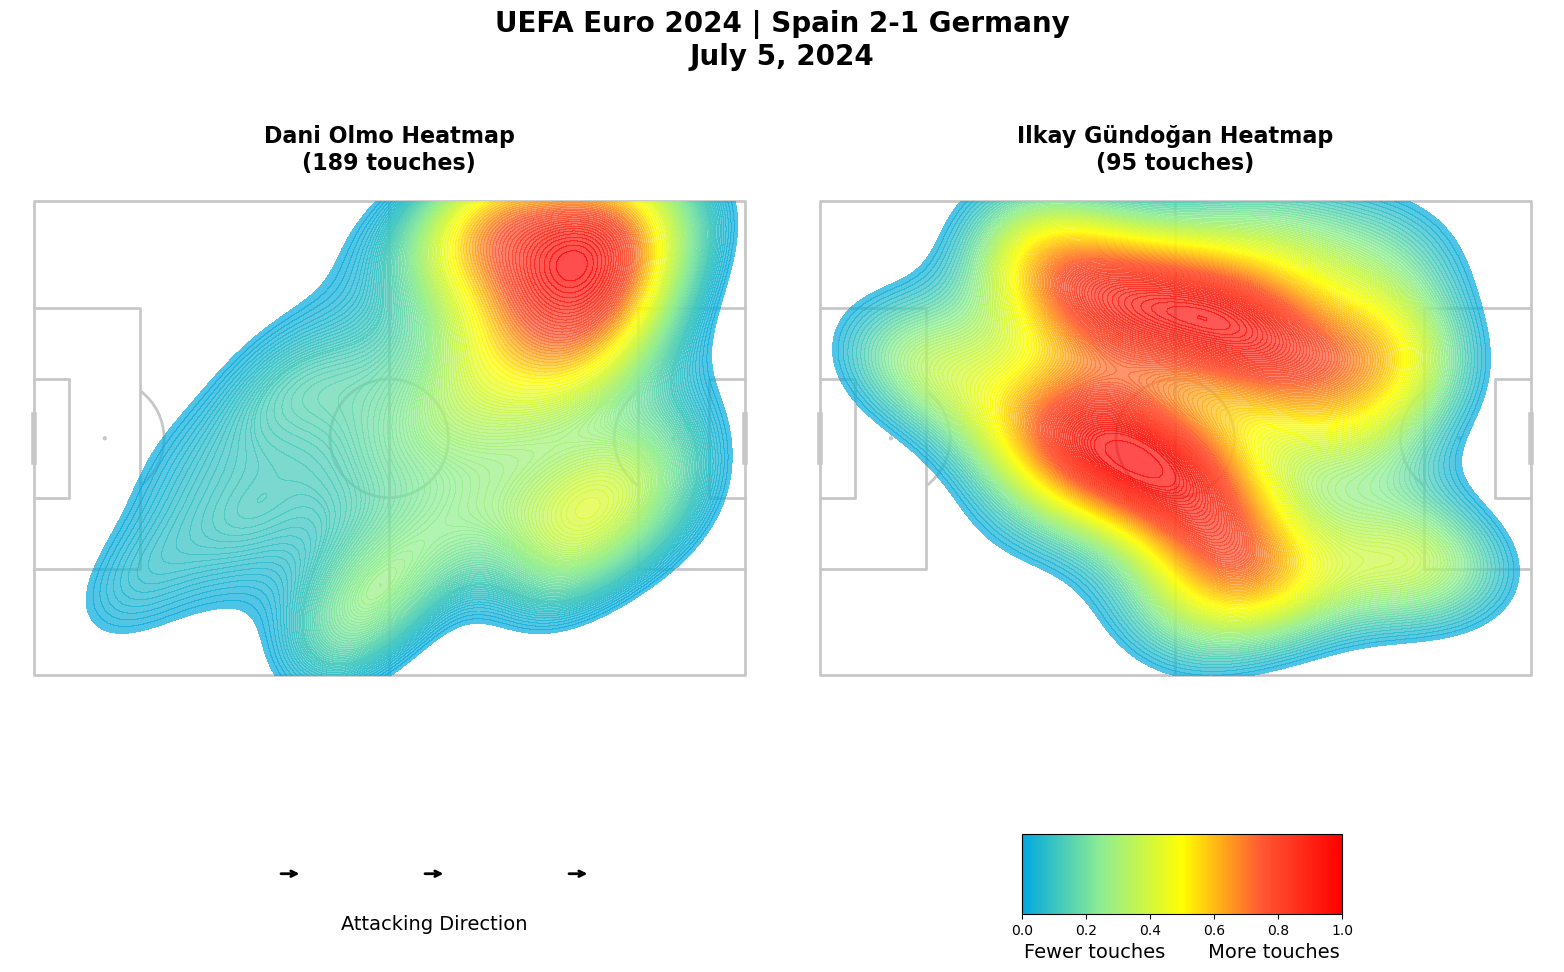

In [7]:
#extract x/y coordinates for both players
olmo_x = [loc[0] for loc in olmo_events['location']]
olmo_y = [loc[1] for loc in olmo_events['location']]
gundo_x = [loc[0] for loc in gundo_events['location']]
gundo_y = [loc[1] for loc in gundo_events['location']]

#total number of touches for each player
olmo_touches = len(olmo_x)
gundo_touches = len(gundo_x)

#pitch dimensions for clipping
pitch_x_limit = (0, 120)  # StatsBomb pitch x-dimension
pitch_y_limit = (0, 80)   # StatsBomb pitch y-dimension

#custom color map
cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#00A9E0', '#90EE90', '#FFFF00', '#FF5733', '#FF0000'])

#create the pitch
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

pitch = Pitch(pitch_type='statsbomb', pitch_color='#f4f4f4', line_color='#c7c7c7')

#olmo heatmap
pitch.draw(ax=axes[0])
sns.kdeplot(x=olmo_x, y=olmo_y, fill=True, cmap=cmap, ax=axes[0], alpha=0.7, levels=100, clip=(pitch_x_limit, pitch_y_limit))
axes[0].set_title(f'Dani Olmo Heatmap\n({olmo_touches} touches)', fontsize=16, fontweight='bold')
axes[0].axis('off')

#gundogan heatmap
pitch.draw(ax=axes[1])
sns.kdeplot(x=gundo_x, y=gundo_y, fill=True, cmap=cmap, ax=axes[1], alpha=0.7, levels=100, clip=(pitch_x_limit, pitch_y_limit))
axes[1].set_title(f'Ilkay Gündoğan Heatmap\n({gundo_touches} touches)', fontsize=16, fontweight='bold')
axes[1].axis('off')

#adding the title
plt.suptitle('UEFA Euro 2024 | Spain 2-1 Germany\nJuly 5, 2024', fontsize=20, fontweight='bold', y=0.98)

#setting the arrows and text for attacking direction under Dani Olmo's pitch
ax_dir = fig.add_axes([0.17, -0.15, 0.3, 0.1])
ax_dir.set_axis_off()
for i in range(3):
    ax_dir.annotate('', xy=(0.1 + i * 0.3, 0.5), xytext=(0.05 + i * 0.3, 0.5),
                    arrowprops=dict(facecolor='gray', arrowstyle="->", lw=2))
ax_dir.text(0.375, -0.2, 'Attacking Direction', ha='center', fontsize=14)

#setting the size of the gradient legend under Ilkay Gündoğan's pitch
cax = fig.add_axes([0.65, -0.15, 0.2, 0.1])  # Adjust size and position for the legend
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Fewer touches       More touches', fontsize=14)

#setting my desktop path
desktop_path = os.path.expanduser('~/Desktop/heatmap_plot.png')

#custom layout
plt.tight_layout(pad=2.0)

#save fig
plt.savefig(desktop_path, dpi=300, bbox_inches='tight')  # dpi=300 for high resolution
plt.show()

In [8]:
#got olmo and gundogan's names wrong at first so i had to check
#what their names are in the data as well as if they have location data

#filter events that have location data
events_with_location = events_df.dropna(subset=['location'])

#check which players have location data in qfinals
players_with_location = events_with_location['player'].apply(lambda x: x['name'] if isinstance(x, dict) else None).dropna().unique()

#print list of players
print("Players with events and location data in this match:")
print(players_with_location)

Players with events and location data in this match:
['Kai Havertz' 'Toni Kroos' 'Robin Aime Robert Le Normand' 'Jamal Musiala'
 'Rodrigo Hernández Cascante' 'Leroy Sané' 'Marc Cucurella Saseta'
 'Lamine Yamal Nasraoui Ebana' 'David Raum' 'Álvaro Borja Morata Martín'
 'Jonathan Tah' 'Pedro González López' 'Emre Can' 'Antonio Rüdiger'
 'Unai Simón Mendibil' 'Aymeric Laporte' 'Joshua Kimmich'
 'Nicholas Williams Arthuer' 'Fabián Ruiz Peña' 'Manuel Neuer'
 'İlkay Gündoğan' 'Daniel Carvajal Ramos' 'Daniel Olmo Carvajal'
 'Florian Wirtz' 'José Ignacio Fernández Iglesias' 'Robert Andrich'
 'Maximilian Mittelstädt' 'Niclas Füllkrug' 'Ferrán Torres García'
 'Mikel Merino Zazón' 'Thomas Müller' 'Mikel Oyarzabal Ugarte'
 'Waldemar Anton' 'José Luis Sanmartín Mato']
